<a href="https://colab.research.google.com/github/ScarrryMary/Project_group24-25/blob/main/Seminar2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

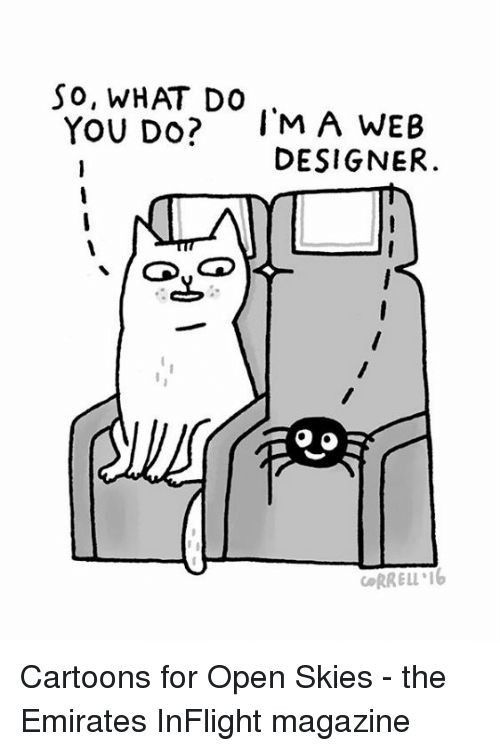

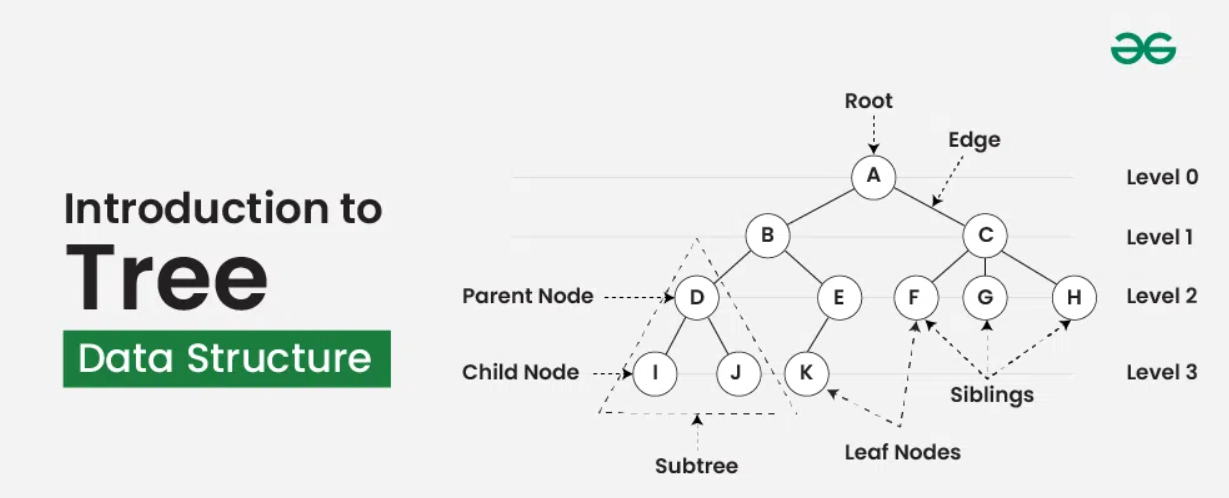

## Реализация графов и деревьев  

В общих словах, мы ищем способ реализации функции смежности, $N(v)$, так, чтобы $N[v]$ было каким-либо набором (или в отдельных случаях просто итератором) смежных с $v$ вершин. Как и во многих других книгах мы сосредоточимся на двух наиболее известных представлениях: списках смежности и матрицах смежности, потому что они наиболее полезны и обобщены.




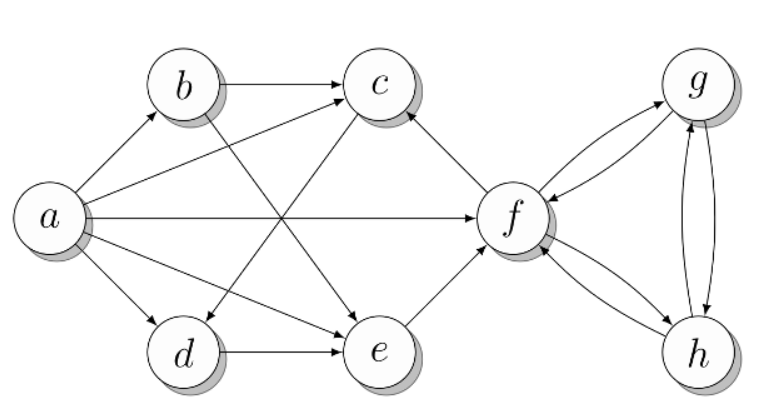

In [ ]:
a, b, c, d, e, f, g, h = range(8)
N = [
	{b, c, d, e, f}, # a
	{c, e}, # b
	{d}, # c
	{e}, # d
	{f}, # e
	{c, g, h}, # f
	{f, h}, # g
	{f, g} # h
]

In [ ]:
b in N[a]  # смежная?

True

In [ ]:
len(N[f])  # степень

3

Другим возможным представлением, которое в некоторых случаях даст меньше накладных расходов, являются собственно списки смежности. Пример такого списка приведен в листинге ниже. Доступны все те же операции, но проверка смежности вершины выполняется за Θ(n). Это дает серьезное снижение скорости, но если вам действительно требуется это представление, то это его единственная проблема. (Если все, что делает ваш алгоритм — это обход соседних вершин, то использование объектов типа множество не просто бессмысленно: накладные расходы могут ухудшить постоянные множители в асимптотике вашей реализации).

In [ ]:
a, b, c, d, e, f, g, h = range(8)
N = [
	[b, c, d, e, f], # a
	[c, e], # b
	[d], # c
	[e], # d
	[f], # e
	[c, g, h], # f
	[f, h], # g
	[f, g] # h
]

Небольшой вариацией на тему этого представления можно назвать сортированные списки смежных вершин. Если списки нечасто меняются, их можно держать отсортированными и использовать бисекцию для проверки смежности вершины, что приведет к немного меньшим накладным расходам (в плане использования памяти и времени итерации), но увеличит сложность проверки до Θ(log2 k), где k — количество смежных с данной вершин. (Это все равно очень маленькое значение. На практике, впрочем, использование встроенного типа set доставляет гораздо меньше хлопот).

Еще одна небольшая доработка заключается в использовании словарей вместо множеств или списков. Смежные вершины могут быть ключам словаря, а в качестве значения можно использовать любые дополнительные данные, например, вес ребра. Как это выглядит можно увидеть в листинге ниже (веса выбраны случайно).


In [ ]:
a, b, c, d, e, f, g, h = range(8)
N = [
	{b:2, c:1, d:3, e:9, f:4}, # a
	{c:4, e:3}, # b
	{d:8}, # c
	{e:7}, # d
	{f:5}, # e
	{c:2, g:2, h:2}, # f
	{f:1, h:6}, # g
	{f:9, g:8} # h
]

In [ ]:
N[a][b]		# вес (a, b)

2

До этого момента сущность, хранящая структуры смежности — списки, множества или словари — была списком, индексированным номерами вершин. Более гибкий вариант (позволяющий использовать произвольные, хэшируемые, имена вершин) строится на базе словаря в качестве основной структуры (такие словари со списками смежности Гвидо ван Россум использовал в своей статье «Python Patterns — Implementing Graphs», выложенной по адресу www.python.org/doc/essays/graphs.html). Листинг ниже показывает пример словаря, содержащего множества смежности. Заметьте, что вершины в нем обозначены символами.

In [ ]:
N = {
	'a': set('bcdef'),
	'b': set('ce'),
	'c': set('d'),
	'd': set('e'),
	'e': set('f'),
	'f': set('cgh'),
	'g': set('fh'),
	'h': set('fg')
}

**Матрицы смежности**

Другая распространенная форма представления графов — это матрицы смежности. Основное отличие их в следующем: вместо перечисления всех смежных с каждой из вершин, мы записываем один ряд значений (массив), каждое из которых соответствует возможной смежной вершине (есть хотя бы одна такая для каждой вершины графа), и сохраняем значение (в виде True или False), показывающее, действительно ли вершина является смежной. И вновь простейшую реализацию можно получить используя вложенные списки, как видно из листинга ниже. Обратите внимание, что это также требует, чтобы вершины были пронумерованы от 0 до V-1. В качестве значений истинности используются 1 и 0 (вместо True и False), чтобы сделать матрицу читабельной.

In [ ]:
a, b, c, d, e, f, g, h = range(8)
# a b c d e f g h
N =  [[0,1,1,1,1,1,0,0], # a
	 [0,0,1,0,1,0,0,0], # b
	 [0,0,0,1,0,0,0,0], # c
	 [0,0,0,0,1,0,0,0], # d
	 [0,0,0,0,0,1,0,0], # e
	 [0,0,1,0,0,0,1,1], # f
	 [0,0,0,0,0,1,0,1], # g
	 [0,0,0,0,0,1,1,0]] # h

Способ использования матриц смежности слегка отличается от списков и множеств смежности. Вместо проверки входит ли b в N[a], вы будете проверять, истинно ли значение ячейки матрицы N[a][b]. Кроме того, больше нельзя использовать len(N[a]), чтобы получить количество смежных вершин, потому что все ряды одной и той же длины. Вместо этого можно использовать функцию sum:

In [ ]:
N[a][b]

1

In [ ]:
sum(N[f])

3

Расширение матрицы смежности для использования весов тривиально: вместо сохранения логических значений, сохраняйте значения весов. В случае с ребром (u, v) N[u][v] будет весом ребра w(u,v) вместо True. Часто в практических целях несуществующим ребрам присваиваются бесконечные веса. (Это гарантирует, что они не будут включены, например, в кратчайшие пути, т. к. мы ищем путь по существующим ребрам). Не всегда очевидно, как представить бесконечность, но совершенно точно есть несколько разных вариантов.

Один из них состоит в том, чтобы использовать некорректное для веса значение, такое как None или -1, если известно, что все веса неотрицательны. Возможно, в ряде случаев полезно использовать действительно большие числа. Для целых весов можно применить sys.maxint, хотя это значение и не обязательно самое большое (длинные целые могут быть больше). Есть и значение, введенное для отражения бесконечности: inf. Оно недоступно в Python напрямую по имени и выражается как float('inf')

In [ ]:
a, b, c, d, e, f, g, h = range(8)
_ = float('inf')
		# a b c d e f g h
W = [[0,2,1,3,9,4,_,_], # a
 	 [_,0,4,_,3,_,_,_], # b
	 [_,_,0,8,_,_,_,_], # c
	 [_,_,_,0,7,_,_,_], # d
	 [_,_,_,_,0,5,_,_], # e
	 [_,_,2,_,_,0,2,2], # f
	 [_,_,_,_,_,1,0,6], # g
	 [_,_,_,_,_,9,8,0]] # h

Конечно, матрицы весов дают возможность очень просто получить веса ребер, но, к примеру, проверка смежности и определение степени вершины, или обход всех смежных вершин делаются иначе. Здесь нужно использовать бесконечное значение, примерно так (для большей наглядности определим inf = float('inf')):

In [ ]:
inf = float('inf')
W[a][b] < inf # смежность

True

In [ ]:
sum(1 for w in W[a] if w < inf) - 1 # степень

5

Обратите внимание, что из полученной степени вычитается 1, потому что мы не считаем значения на диагонали. Сложность вычисления степени тут Θ(n), в то время как в другом представлении и смежность, и степень вершины можно определить за константное время. Так что вы всегда должны понимать, как именно вы собираетесь использовать ваш граф и выбирать для него соответствующее представление.

In [ ]:
import numpy as np

N = np.zeros([10,10])

### Реализация деревьев

Любое представление графов, естественно, можно использовать для представления деревьев, потому что деревья — это особый вид графов. Однако, деревья играют свою большую роль в алгоритмах, и для них разработано много соответствующих структур и методов. Большинство алгоритмов на деревьях (например, поиск по деревьям) можно рассматривать в терминах теории графов, но специальные структуры данных делают их проще в реализации.
Проще всего описать представление дерева с корнем, в котором ребра спускаются вниз от корня. Такие деревья часто отображают иерархическое ветвление данных, где корень отображает все объекты (которые, возможно, хранятся в листьях), а каждый внутренний узел показывает объекты, содержащиеся в дереве, корень которого — этот узел. Это описание можно использовать, представив каждое поддерево списком, содержащим все его поддеревья-потомки.

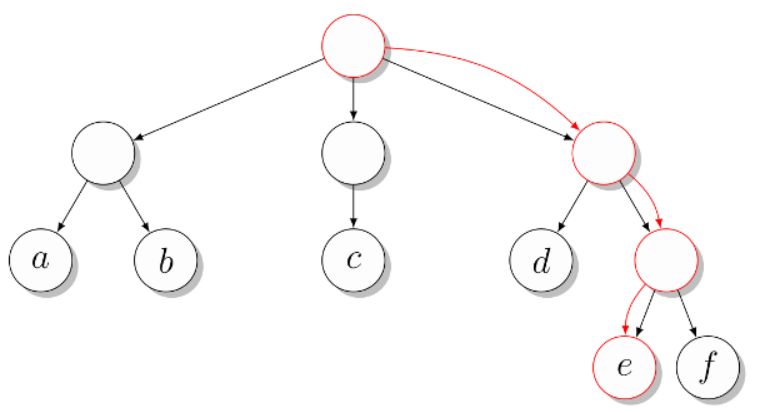

Мы можем представить это дерево как список списков:

In [ ]:
T = [["a", "b"], ["c"], ["d", ["e", "f"]]]

In [ ]:
T[0][1]

'b'

In [ ]:
T[2][1][0]

'e'

В ряде случаев возможно заранее определить максимальное число потомков каждого узла. (Например, каждый узел бинарного дерева может иметь до двух потомков). Поэтому можно использовать другие представления, скажем, объекты с отдельным атрибутом для каждого из потомков как в листинге ниже.

In [ ]:
class Tree:
	def __init__(self, left, right):
		self.left = left
		self.right = right

In [ ]:
t = Tree(Tree("a", "b"), Tree("c", "d"))

t.right.left

'c'

Для обозначения отсутствующих потомков можно использовать None (в случае если у узла только один потомок). Само собой, можно комбинировать разные методы (например, использовать списки или множества потомков для каждого узла).

Распространенный способ реализации деревьев, особенно на языках, не имеющих встроенной поддержки списков, это так называемое представление «первый потомок, следующий брат». В нем каждый узел имеет два «указателя» или атрибута, указывающих на другие узлы, как в бинарном дереве. Однако, первый из этих атрибутов ссылается на первого потомка узла, а второй — на его следующего брата (т.е. узел, имеющий того же родителя, но находящийся правее, — прим. перев). Иными словами, каждый узел дерева имеет указатель на связанный список его потомков, а каждый из этих потомков ссылается на свой собственный аналогичный список. Таким образом, небольшая модификация бинарного дерева даст нам многопутевое дерево, показанное в листинге ниже.

In [ ]:
class Tree:
	def __init__(self, kids, next=None):
		self.kids = self.val = kids
		self.next = next

Отдельный атрибут val здесь введен просто для того, чтобы получить понятный вывод при указании значения (например, «c») вместо ссылки на узел.

In [ ]:
t = Tree(Tree("a", Tree("b", Tree("c", Tree("d")))))
t.kids.next.next.val

'c'

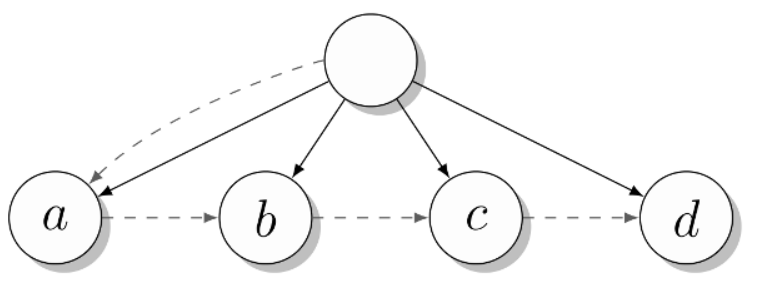

Атрибуты kids и next показаны пунктирными линиями, а сами ребра дерева — сплошными.

В более сложном дереве вместо использования одного атрибута и для хранения значения узла и для ссылки на список потомков, для обеих целей могут понадобиться отдельный атрибуты. Обычно для обхода дерева используется более сложный код (включая циклы и рекурсию), чем приведенный здесь с жестко заданным путем.

Прикольные ресурсы: https://gato.sourceforge.net/

## Деревья

**Древовидная структура данных** — это иерархическая структура, которая используется для представления и организации данных в виде родительских дочерних отношений. Ниже приведены некоторые ситуации из реального мира, которые по своей природе являются деревом.

* Структура папок в операционной системе.

* Структура тегов в документе HTML (корневой тег as html) или XML.

Самый верхний узел дерева называется корневым, а узлы ниже него — дочерними узлами. Каждый узел может иметь несколько дочерних узлов, и эти дочерние узлы также могут иметь свои собственные дочерние узлы, образуя рекурсивную структуру.

**Основные термины в древовидной структуре данных**:  
* Родительский узел: Узел, который является непосредственным предшественником узла, называется родительским узлом этого узла. {B} является родительским узлом {D, E}.

* Дочерний узел: Узел, который является непосредственным преемником узла, называется дочерним узлом этого узла. Примеры: {D, E} являются дочерними узлами {B}.

* Корневой узел: Самый верхний узел дерева или узел, у которого нет родительского узла, называется корневым узлом. {А} - корневой узел дерева. Непустое дерево должно содержать ровно один корневой узел и ровно один путь от корня ко всем остальным узлам дерева.

* Конечный узел или внешний узел: узлы, не имеющие дочерних узлов, называются конечными узлами. {I, J, K, F, G, H} — листовые узлы дерева.

* Предок узла: Любые предшествующие узлы на пути корня к этому узлу называются предками этого узла. {A,B} являются предковыми узлами узла {E}

* Потомок: узел x является потомком другого узла y тогда и только тогда, когда y является предком x.

* Одноуровневый: Дочерние элементы одного и того же родительского узла называются одноуровневыми. {D,E} называются братьями и сестрами.

* Уровень узла: количество ребер на пути от корневого узла к этому узлу. Корневой узел имеет уровень 0.
* Внутренний узел: узел, имеющий хотя бы один дочерний узел, называется внутренним узлом.
* Сосед узла: Родительские или дочерние узлы этого узла называются соседями этого узла.

* Поддерево: Любой узел дерева вместе с его потомком.

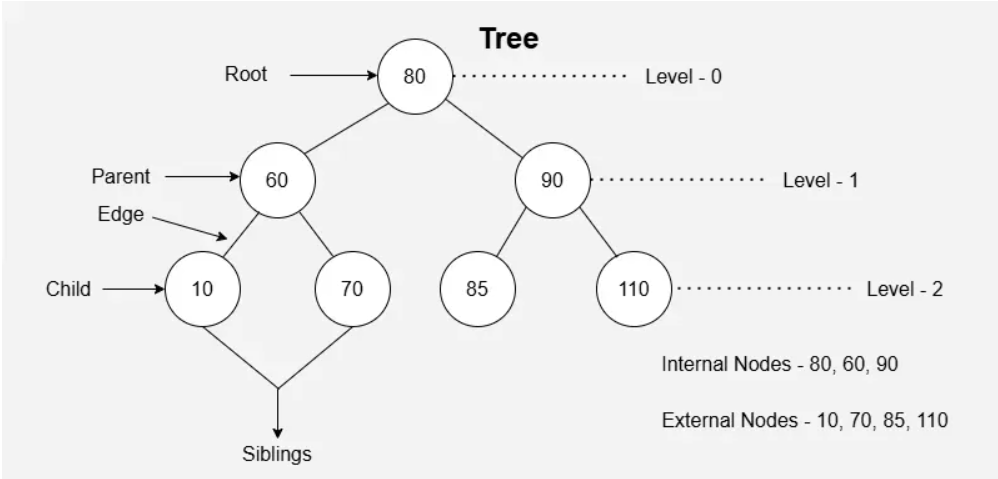

**Представление древовидной структуры данных:**  
Дерево состоит из корневого узла и нуля или более поддеревьев T1, т2, ... , Тk таким образом, что от корневого узла дерева до корневого узла каждого поддерева имеется ребро. Поддерево узла X состоит из всех узлов, которые имеют узел X в качестве предкового узла.

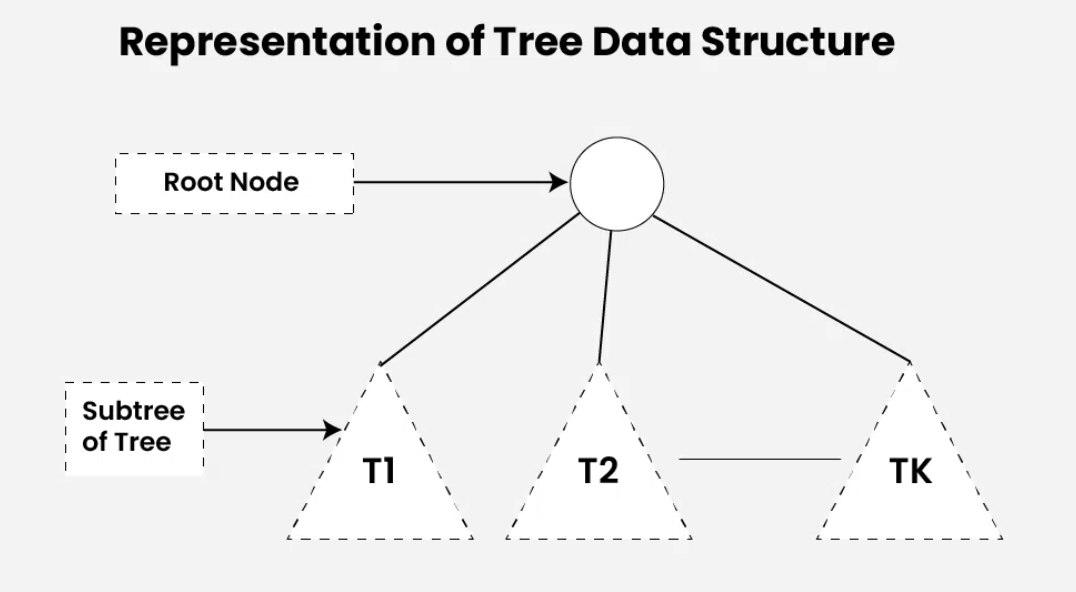

Дерево может быть представлено с помощью коллекции узлов. Каждый из узлов может быть представлен с помощью класса или структур

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.children = []


**Типы древовидных структур данных**:
Древовидную структуру данных можно разделить на три типа в зависимости от количества дочерних элементов в каждом узле дерева. Виды бывают следующими:

* **Двоичное дерево**: В двоичном дереве каждый узел может иметь не более двух дочерних элементов, связанных с ним. Некоторые распространенные типы двоичных деревьев включают полные двоичные деревья, полные двоичные деревья, сбалансированные двоичные деревья и вырожденные или патологические двоичные деревья. Примерами двоичного дерева являются двоичное дерево поиска и двоичная куча.

* **Троичное дерево**: Троичное дерево — это древовидная структура данных, в которой каждый узел имеет не более трех дочерних узлов, обычно различаемых как «левый», «средний» и «правый».

* **N-ичное дерево или родовое дерево**: Родовые деревья представляют собой коллекцию узлов, где каждый узел представляет собой структуру данных, состоящую из записей и списка ссылок на свои дочерние элементы (дубликаты ссылок не допускаются). В отличие от связанного списка, каждый узел хранит адреса нескольких узлов.

Типы деревьев: https://www.geeksforgeeks.org/types-of-trees-in-data-structures/

**Основные операции с древовидной структурой данных**:

* Create – создание дерева в структуре данных.

* Вставить − Вставляет данные в дерево.

* Поиск − Поиск определенных данных в дереве, чтобы проверить, присутствуют они или нет.
* Перемещение:
-- Обход методом поиска в глубину
-- Обход по принципу «сначала вширь»

Реализация древовидной структуры данных:

In [ ]:
from collections import deque

# Function to add an edge between vertices x and y
def addEdge(x, y, adj):
    adj[x].append(y)
    adj[y].append(x)

# Function to print the parent of each node
def printParents(node, adj, parent):
    # current node is Root, thus, has no parent
    if parent == 0:
        print("{}->Root".format(node))
    else:
        print("{}->{}".format(node, parent))

    # Using DFS
    for cur in adj[node]:
        if cur != parent:
            printParents(cur, adj, node)

# Function to print the children of each node
def printChildren(Root, adj):
    # Queue for the BFS
    q = deque()
    # pushing the root
    q.append(Root)
    # visit array to keep track of nodes that have been
    # visited
    vis = [0] * len(adj)
    # BFS
    while q:
        node = q.popleft()
        vis[node] = 1
        print("{}->".format(node)),
        for cur in adj[node]:
            if vis[cur] == 0:
                print(cur),
                q.append(cur)
        print()

# Function to print the leaf nodes
def printLeafNodes(Root, adj):
    # Leaf nodes have only one edge and are not the root
    for i in range(1, len(adj)):
        if len(adj[i]) == 1 and i != Root:
            print(i),

# Function to print the degrees of each node
def printDegrees(Root, adj):
    for i in range(1, len(adj)):
        print(i, ":"),
        # Root has no parent, thus, its degree is equal to
        # the edges it is connected to
        if i == Root:
            print(len(adj[i]))
        else:
            print(len(adj[i]) - 1)

# Driver code
N = 7
Root = 1
# Adjacency list to store the tree
adj = [[] for _ in range(N + 1)]
# Creating the tree
addEdge(1, 2, adj)
addEdge(1, 3, adj)
addEdge(1, 4, adj)
addEdge(2, 5, adj)
addEdge(2, 6, adj)
addEdge(4, 7, adj)

# Printing the parents of each node
print("The parents of each node are:")
printParents(Root, adj, 0)

# Printing the children of each node
print("The children of each node are:")
printChildren(Root, adj)

# Printing the leaf nodes in the tree
print("The leaf nodes of the tree are:")
printLeafNodes(Root, adj)

# Printing the degrees of each node
print("The degrees of each node are:")
printDegrees(Root, adj)


The parents of each node are:
1->Root
2->1
5->2
6->2
3->1
4->1
7->4
The children of each node are:
1->
2
3
4

2->
5
6

3->

4->
7

5->

6->

7->

The leaf nodes of the tree are:
3
5
6
7
The degrees of each node are:
1 :
3
2 :
2
3 :
0
4 :
1
5 :
0
6 :
0
7 :
0


**Свойства древовидной структуры данных**:
* Количество ребер: Ребро может быть определено как соединение между двумя узлами. Если дерево имеет N узлов, то оно будет иметь (N-1) ребер. Существует только один путь от каждого узла к любому другому узлу дерева.

* Глубина узла: Глубина узла определяется как длина пути от корня к этому узлу. Каждое ребро добавляет к контуру 1 единицу длины. Таким образом, его также можно определить как количество ребер на пути от корня дерева до узла.

* Высота узла: Высота узла может быть определена как длина самого длинного пути от узла до конечного узла дерева.

* Высота дерева: Высота дерева — это длина самого длинного пути от корня дерева до листа дерева.

* Степень узла: Общее количество поддеревьев, прикрепленных к этому узлу, называется степенью узла. Степень листового узла должна быть равна 0. Степень дерева — это максимальная степень узла среди всех узлов в дереве.

## Тот самый один алгоритм
Мы начинаем с узла start и можем двигаться по рёбрам графа от узла к узлу. На каждой итерации алгоритма у нас есть некоторый узел, который мы называем текущим, и именно на нём сосредоточено наше внимание. Мы исследуем его соседей, то есть узлы, к которым потенциально можем перейти на следующей итерации.

Помимо текущего узла нам нужно где-то хранить ещё не посещённые узлы, куда можно перейти на следующей итерации. Это узлы, которые мы уже встречали как соседей, но не рассматривали в качестве текущего. Хранить такие узлы будем в специальном хранилище, которое назовём nodes_storage.

Для текущего узла всегда проверяем, является ли он целевым. Если да, значит мы прибыли: путь от start до target найден, и алгоритм поиска может быть прерван. В противном случае мы должны рассмотреть узлы, соседние с текущим, и добавить их в хранилище nodes_storage.

Чтобы не запутаться и не ходить по одним и тем же узлам несколько раз, мы будем раскрашивать узлы графа следующим образом:

* белый —  мы ещё не посещали и даже не встречали этот узел;

* серый —  мы встречали этот узел в качестве соседа и уже добавили его в nodes_storage, но ещё не посещали его;

* чёрный  —  этот узел посещён и больше не нуждается в анализе.

Изначально все узлы белые. Если мы встречаем узел как соседа, мы окрашиваем его в серый. И только когда мы посетили узел, обработали всех его соседей, и он больше не нужен — красим его в чёрный цвет.

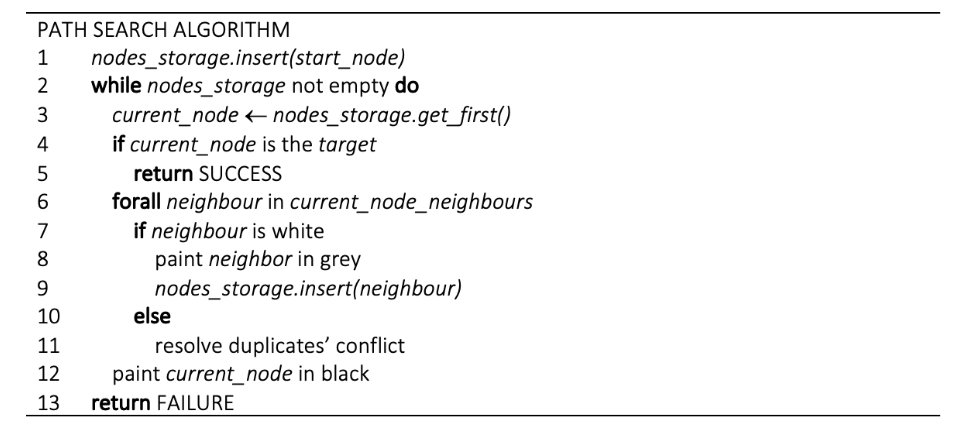

In [ ]:
def find_path(
        graph: Graph,
        start_node: int,
        target_node: int,
        nodes_storage_structure_name: AbstractNodeStorageClass,
    ) -> bool:
    """
        Универсальный алгоритм обхода графа в поисках пути между
        начальным (start) и целевым (target) узлами, используя
        структуру графа и вспомогательную структуру nodes_storage.
        Возвращает True, если путь найден.
    """

    # красим все узлы в белый
    color = ['white'] * graph.number_of_nodes()
    # в начале поиска расстояние до всех узлов кроме начального равны ∞
    dist = [float('Inf')] * graph.number_of_nodes()
    dist[start_node] = 0

    # положим start_node внутрь nodes_storage
    nodes_storage.insert(start_node)

    # цикл пока внутри nodes_storage есть узлы
    while not nodes_storage.is_empty():
        current_node = nodes_storage.get_first()

        if current_node == target_node:
            # конец поиска, целевой узел найден, а значит и путь до него
            return True

        # возьмём всех соседей текущего узла
        neighbours = list(graph.adj[current_node])
        for node_to_go in neighbours:
            # если этот узел встречается впервые
            if color[node_to_go] == 'white':
                # красим его в серый
                color[node_to_go] = 'grey'

                # обновляем расстояние от стартового узла
                dist[node_to_go] = dist[current_node] + \
                  graph.get_edge_data(node_to_go, current_node)['weight']

                # добавляем узел в nodes_storage
                nodes_storage.insert(node_to_go)
            else:
                # иначе нам нужно решить конфликт дублирования (два пути
                # к одному узлу). Выбираем из двух путей более короткий.
                weight_from_current_node = graph.get_edge_data(node_to_go, current_node)['weight']
                if dist[current_node] + weight_from_current_node < dist[node_to_go]:
                    dist[node_to_go] = dist[current_node] + weight_from_current_node

        # красим текущий узел в чёрный, он нам больше не интересен
        color[current_node] = 'black'
    return False

## Поиск в глубину (DFS)
DFS рекурсивно обходит граф, "углубляясь" как можно дальше по каждой ветви.

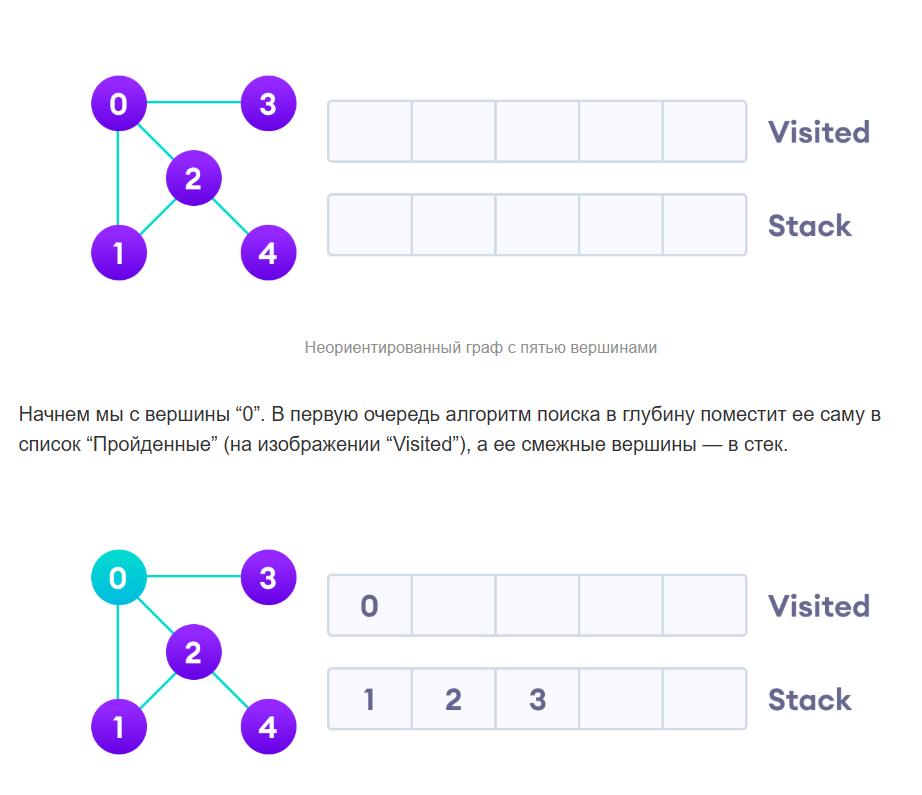

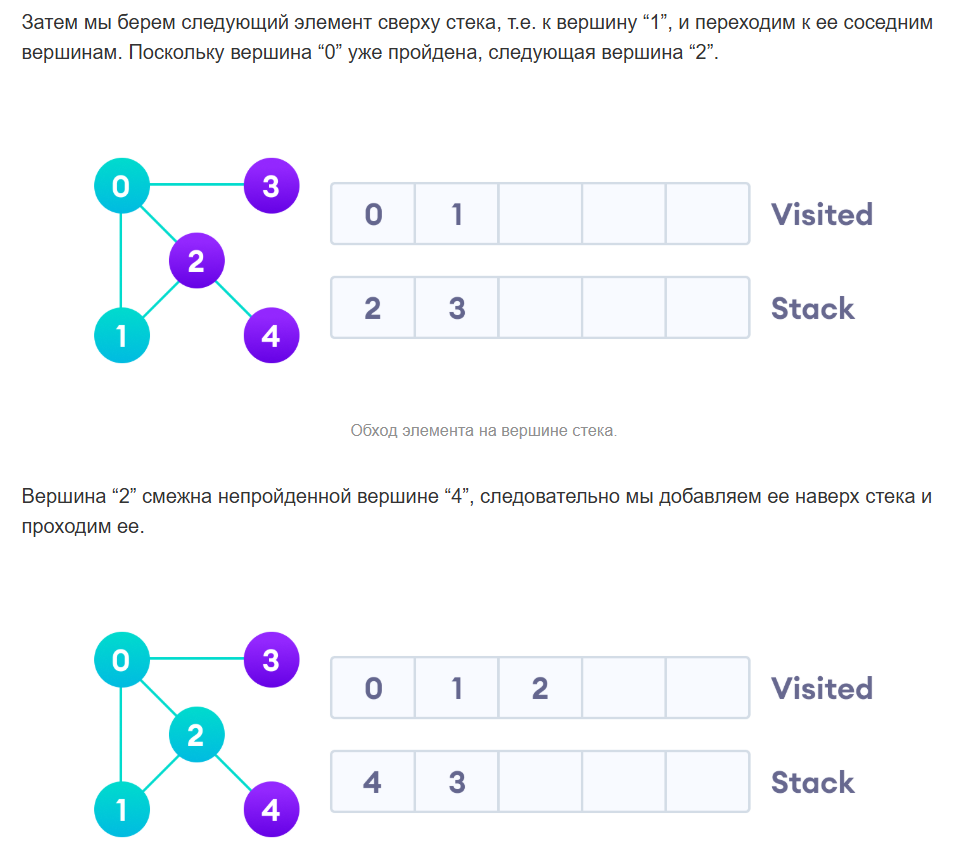

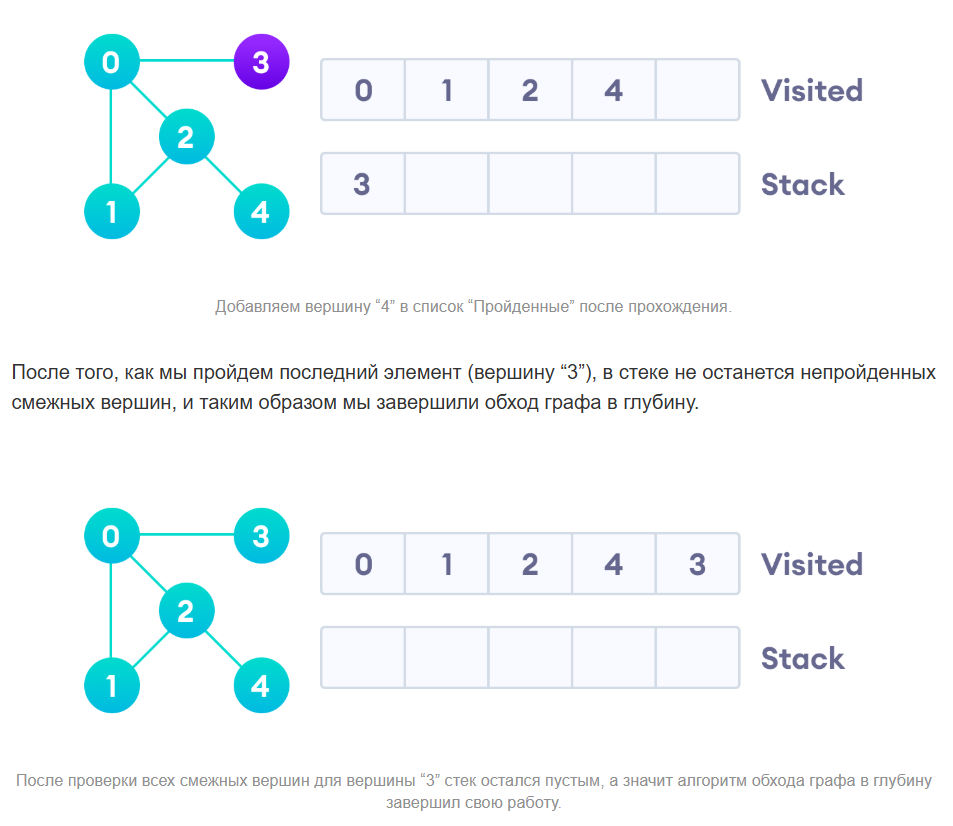

In [ ]:
# Пример представления графа списком смежности
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

In [ ]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end=' ')
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

# Пример использования
dfs(graph, 'A')

A B D E F C 

**Сложность алгоритма поиска в глубину**  
* Временная сложность алгоритма поиска в глубину представлена ​​в виде O(V + E), где V — количество вершин, а E — количество ребер.

* Пространственная сложность алгоритма равна O(V).

**Применения алгоритма**
* Для поиска пути.

* Для проверки двудольности графа.

* Для поиска сильно связанных компонентов графа.

* Для обнаружения циклов в графе.

## Поиск в ширину (BFS)

BFS обходит граф уровень за уровнем, используя очередь. Чтобы выполнить Поиск в ширину, нужно вместо стека использовать очередь:

In [ ]:
class Queue(AbstractNodeStorageClass):
    """
        Очередь работает по принципу FIFO - первым возвращается
        элемент, добавленный раньше всех.
    """

    def __init__(self):
        self.nodes = []

    def get_first(self):
        return self.nodes.pop(0)

    def insert(self, node_number):
        self.nodes.append(node_number)

    def empty(self):
        return len(self.nodes) == 0

In [ ]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)
    while queue:
        vertex = queue.popleft()
        print(vertex, end=' ')
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

# Пример использования
bfs(graph, 'A')

A B C D E F 

Красивый пример: https://ru.hexlet.io/courses/algorithms-graphs/lessons/in-breadth-search/theory_unit?ysclid=m7xiv2w6al481106547

Анимация: https://habr.com/ru/companies/yandex_praktikum/articles/705178/

https://neerc.ifmo.ru/wiki/index.php?title=%D0%A4%D0%B0%D0%B9%D0%BB:Graph-BFS.gif

### **Задача**: Проверка на связность  
Напишите функцию, которая проверяет, является ли граф связным (то есть, можно ли из любой вершины добраться до любой другой).

In [ ]:
def is_connected(graph):
    pass  # Ваш код здесь

# Пример использования
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A'],
    'D': ['B'],
    'E': ['F'],
    'F': ['E']
}

print(is_connected(graph))  # Ожидаемый вывод: False

None


### **Задача**: Поиск цикла в графе
Напишите функцию, которая определяет, содержит ли граф цикл. Используйте алгоритм поиска в глубину (DFS).

In [ ]:
def has_cycle(graph):
    pass  # Ваш код здесь

# Пример использования
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A'],
    'D': ['B']
}

print(has_cycle(graph))  # Ожидаемый вывод: True

None


## Обход дерева
* Pre-order:
В этом порядке сначала посещается корень, затем рекурсивно обходится левое поддерево, а затем правое.

* In-order: В этом порядке сначала рекурсивно обходится левое поддерево, затем посещается корень, а затем правое поддерево. Этот порядок особенно полезен для бинарных деревьев поиска (BST), так как он возвращает узлы в отсортированном порядке.

* Post-order: В этом порядке сначала рекурсивно обходится левое поддерево, затем правое, а затем посещается корень. Этот порядок полезен, например, для удаления дерева, так как корень удаляется последним.

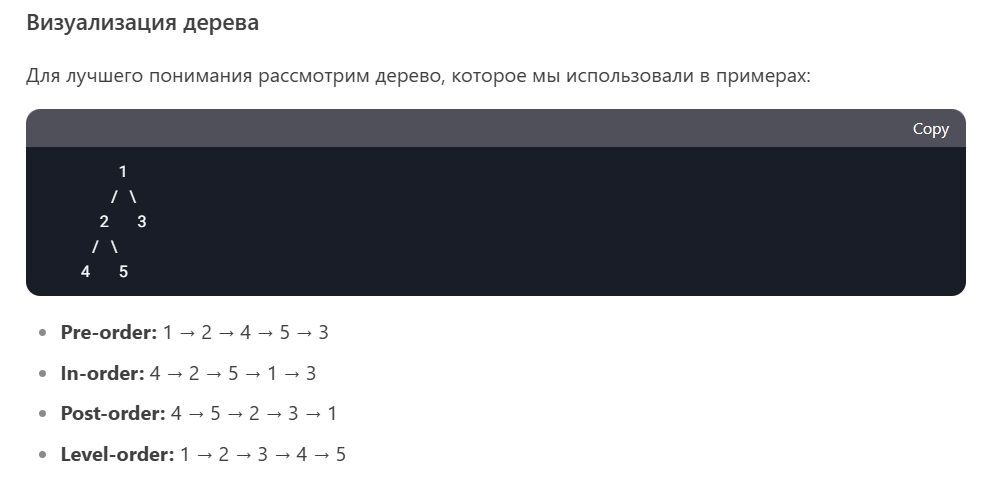

In [ ]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def pre_order(node):
    if node:
        print(node.value, end=' ')
        pre_order(node.left)
        pre_order(node.right)

def in_order(node):
    if node:
        in_order(node.left)
        print(node.value, end=' ')
        in_order(node.right)

def post_order(node):
    if node:
        post_order(node.left)
        post_order(node.right)
        print(node.value, end=' ')

# Пример дерева
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)

print("Pre-order:")
pre_order(root)
print("\nIn-order:")
in_order(root)
print("\nPost-order:")
post_order(root)

Pre-order:
1 2 4 5 3 
In-order:
4 2 5 1 3 
Post-order:
4 5 2 3 1 

## Поиск наименьшего общего предка (LCA - Lowest Common Ancestor)

Наименьший общий предок (LCA) двух узлов в графе (или дереве) — это узел, который является предком обоих узлов и находится на максимальной глубине (то есть ближайший к этим узлам).

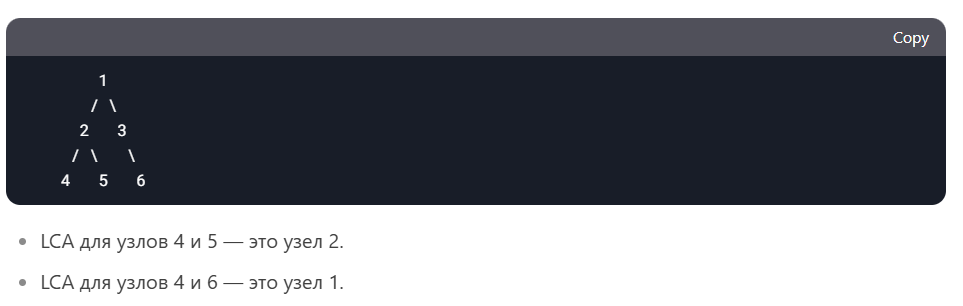

**Для деревьев**:
* В случае деревьев (особенно бинарных) задача поиска LCA решается эффективно с использованием рекурсии или других методов.

**Для графов**:
* В общем случае граф может быть произвольным (не обязательно деревом), и задача поиска LCA становится сложнее. Однако если граф является ориентированным ациклическим графом (DAG), то можно использовать следующие подходы:

- - Метод с использованием поиска в глубину (DFS):

- - -  Найти пути от корня до каждого из двух узлов.

- - - Найти последний общий узел в этих путях.

- - Метод с использованием BFS и предков:

- - - Построить таблицу предков для каждого узла.

- - - Использовать BFS для поиска общего предка.

- - Метод с использованием бинарного подъема (для деревьев):

- - - Эффективный метод для деревьев, который использует предварительную обработку для быстрого поиска LCA.

### Реализация LCA для деревьев (рекурсивный метод)

In [ ]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def find_lca(root, node1, node2):
    # Базовый случай: если дерево пустое или текущий узел равен одному из искомых
    if root is None or root.value == node1 or root.value == node2:
        return root

    # Рекурсивно ищем LCA в левом и правом поддеревьях
    left_lca = find_lca(root.left, node1, node2)
    right_lca = find_lca(root.right, node1, node2)

    # Если оба поддерева возвращают не-None, значит, текущий узел — LCA
    if left_lca and right_lca:
        return root

    # Возвращаем не-None поддерево
    return left_lca if left_lca else right_lca

# Пример дерева
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

# Поиск LCA
lca = find_lca(root, 4, 5)
print("LCA of 4 and 5:", lca.value if lca else "None")  # Ожидаемый вывод: 2

lca = find_lca(root, 4, 6)
print("LCA of 4 and 6:", lca.value if lca else "None")  # Ожидаемый вывод: 1

LCA of 4 and 5: 2
LCA of 4 and 6: 1


### Реализация LCA для графов (DAG)
Для графов, которые являются DAG, можно использовать метод с поиском путей от корня до каждого из узлов.

In [ ]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def find_all_paths(self, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]
        if start not in self.graph:
            return []
        paths = []
        for node in self.graph[start]:
            if node not in path:
                new_paths = self.find_all_paths(node, end, path)
                for p in new_paths:
                    paths.append(p)
        return paths

    def find_lca(self, root, node1, node2):
        # Находим все пути от корня до node1 и node2
        paths_node1 = self.find_all_paths(root, node1)
        paths_node2 = self.find_all_paths(root, node2)

        # Находим последний общий узел в путях
        lca = None
        for p1 in paths_node1:
            for p2 in paths_node2:
                for i in range(min(len(p1), len(p2))):
                    if p1[i] == p2[i]:
                        lca = p1[i]
                    else:
                        break
        return lca

# Пример графа
g = Graph()
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(2, 4)
g.add_edge(2, 5)
g.add_edge(3, 6)
g.add_edge(3, 7)

# Поиск LCA
lca = g.find_lca(1, 4, 5)
print("LCA of 4 and 5:", lca)  # Ожидаемый вывод: 2

lca = g.find_lca(1, 4, 6)
print("LCA of 4 and 6:", lca)  # Ожидаемый вывод: 1

LCA of 4 and 5: 2
LCA of 4 and 6: 1


### Оптимизация для деревьев: метод бинарного подъема
Для больших деревьев рекурсивный метод может быть неэффективным. Метод бинарного подъема позволяет находить LCA за время $O(log N)$ после предварительной обработки за $O(N log N)$.

Основные шаги:
* Предварительная обработка:

- - Для каждого узла сохраняем его предков на уровнях, кратных степеням двойки (1, 2, 4, 8, ...).

* Поиск LCA:

- - Выравниваем глубину двух узлов.

- - Поднимаемся от узлов до их общего предка.

Реализация:

In [ ]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.ancestors = []  # Список предков на уровнях 2^k

def preprocess_lca(root, parent, ancestors):
    root.ancestors = [parent] + ancestors
    if root.left:
        preprocess_lca(root.left, root, root.ancestors)
    if root.right:
        preprocess_lca(root.right, root, root.ancestors)

def find_lca_binary_lifting(node1, node2):
    # Выравниваем глубину
    if len(node1.ancestors) < len(node2.ancestors):
        node1, node2 = node2, node1
    for i in range(len(node1.ancestors) - len(node2.ancestors)):
        node1 = node1.ancestors[i]

    # Поднимаемся до общего предка
    for i in range(len(node2.ancestors) - 1, -1, -1):
        if node1.ancestors[i] != node2.ancestors[i]:
            node1 = node1.ancestors[i]
            node2 = node2.ancestors[i]
    return node1.ancestors[0]

# Пример дерева
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

# Предварительная обработка
preprocess_lca(root, None, [])

# Поиск LCA
lca = find_lca_binary_lifting(root.left.left, root.left.right)
print("LCA of 4 and 5:", lca.value if lca else "None")  # Ожидаемый вывод: 2

LCA of 4 and 5: 2


* LCA для деревьев можно эффективно находить с помощью рекурсии или метода бинарного подъема.

* LCA для графов (DAG) требует поиска путей от корня до узлов.

* Метод бинарного подъема особенно полезен для больших деревьев, так как он работает за O(log N).

## Алгоритм Дейкстры  

Алгоритм Дейкстры находит кратчайший путь от одной вершины до всех остальных в графе с неотрицательными весами ребер.

https://habr.com/ru/companies/yandex_praktikum/articles/705178/

**Основные идеи алгоритма**
* Жадный подход:

- - На каждом шаге алгоритм выбирает вершину с наименьшим известным расстоянием от начальной вершины и "фиксирует" это расстояние.

* Релаксация:

- - Для каждой вершины алгоритм проверяет, можно ли улучшить расстояние до соседних вершин через текущую вершину.

* Использование приоритетной очереди:

- - Для эффективного выбора вершины с наименьшим расстоянием используется структура данных "куча" (или приоритетная очередь).

**Шаги алгоритма**
* Инициализация:

- - Устанавливаем расстояние до начальной вершины равным 0.

- - Устанавливаем расстояния до всех остальных вершин равными бесконечности.

Добавляем все вершины в приоритетную очередь.

* Основной цикл:

- - Извлекаем вершину с наименьшим расстоянием из очереди.

- - Для каждого соседа этой вершины выполняем релаксацию:

- - Если найден более короткий путь, обновляем расстояние и добавляем вершину в очередь.

* Завершение:

- - Алгоритм завершается, когда очередь пуста или когда все вершины обработаны.

In [ ]:
import heapq

def dijkstra(graph, start):
    # Инициализация расстояний
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0  # Расстояние до начальной вершины равно 0

    # Приоритетная очередь (куча)
    pq = [(0, start)]  # (расстояние, вершина)

    while pq:
        current_distance, current_vertex = heapq.heappop(pq)

        # Если текущее расстояние больше известного, пропускаем
        if current_distance > distances[current_vertex]:
            continue

        # Релаксация соседей
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

# Пример графа
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'D': 2, 'E': 5},
    'C': {'A': 4, 'F': 3},
    'D': {'B': 2},
    'E': {'B': 5, 'F': 1},
    'F': {'C': 3, 'E': 1}
}

# Поиск кратчайших путей от вершины 'A'
start_vertex = 'A'
shortest_paths = dijkstra(graph, start_vertex)

print("Кратчайшие пути от вершины", start_vertex)
for vertex, distance in shortest_paths.items():
    print(f"До вершины {vertex}: {distance}")

Кратчайшие пути от вершины A
До вершины A: 0
До вершины B: 1
До вершины C: 4
До вершины D: 3
До вершины E: 6
До вершины F: 7


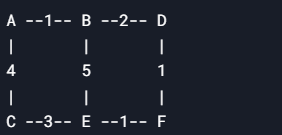

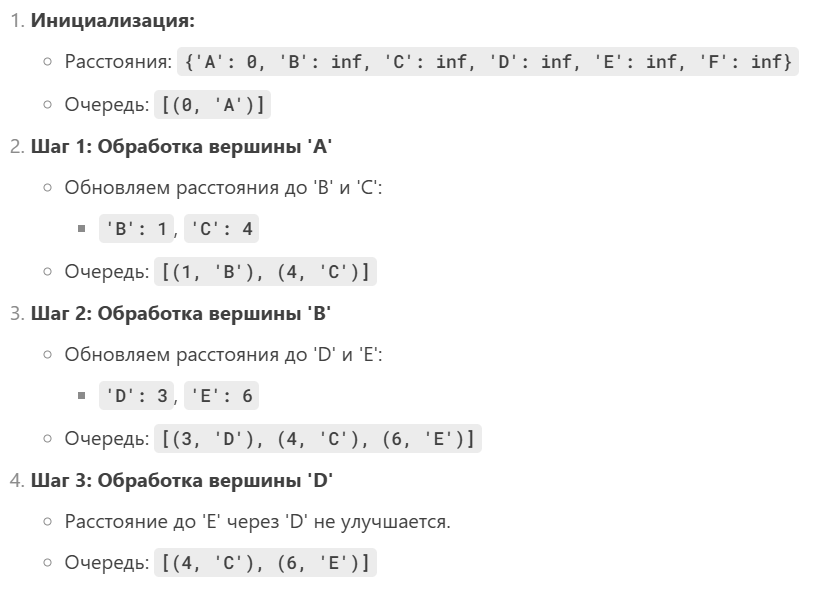

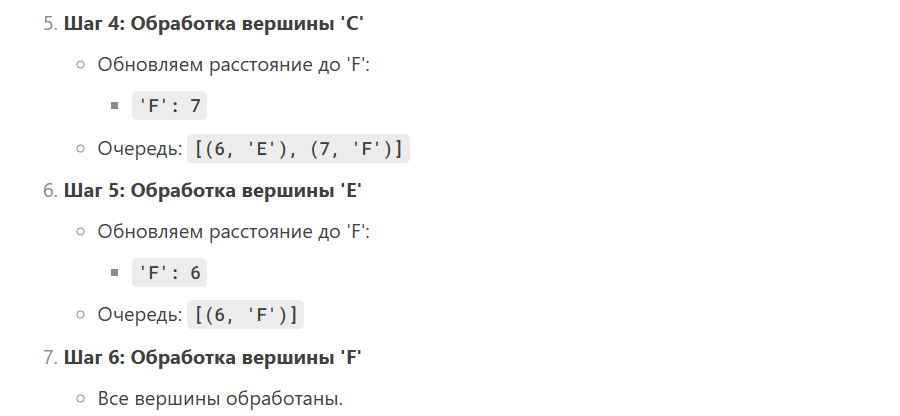

**Сложность алгоритма**  
* Время работы: $O((V + E) * log V)$, где $V$ — количество вершин, $E$ — количество ребер.

Это связано с использованием приоритетной очереди (кучи).

* Память: $O(V)$ для хранения расстояний и очереди.

**Ограничения алгоритма Дейкстры**
* Не работает с отрицательными весами:

Если в графе есть ребра с отрицательными весами, алгоритм Дейкстры может дать неверный результат. В таких случаях используется алгоритм Беллмана-Форда.

* Неэффективен для плотных графов:

Если граф очень плотный (много ребер), алгоритм может работать медленно.

## Алгоритм Крускала
Алгоритм Крускала находит минимальное остовное дерево в графе.

**Минимальное остовное дерево** — это подграф исходного графа, который:

* Является деревом (т.е. не содержит циклов).

* Содержит все вершины исходного графа.

* Имеет минимально возможный суммарный вес ребер.

**Основные идеи алгоритма Крускала**
* Жадный подход:

Алгоритм на каждом шаге выбирает ребро с наименьшим весом, которое не образует цикл с уже выбранными ребрами.

* Использование структуры данных "система непересекающихся множеств" (DSU):

Для эффективной проверки, образует ли добавление ребра цикл.

* Сортировка ребер:

Все ребра графа сортируются по весу в порядке возрастания.

**Шаги алгоритма Крускала**
* Инициализация:

Создаем пустое множество ребер для MST.

Каждая вершина графа представляет собой отдельное множество (используется DSU).

* Сортировка ребер:

Сортируем все ребра графа по весу в порядке возрастания.

* Основной цикл:

Проходим по отсортированным ребрам.

Для каждого ребра проверяем, принадлежат ли его вершины разным множествам (с помощью DSU).

- - Если да, добавляем ребро в MST и объединяем множества вершин.

- - Если нет, пропускаем ребро (оно образует цикл).

* Завершение:

Алгоритм завершается, когда в MST будет V - 1 ребер (где V — количество вершин).

In [ ]:
def kruskal(graph):
    parent = {}
    def find(vertex):
        if parent[vertex] != vertex:
            parent[vertex] = find(parent[vertex])
        return parent[vertex]
    def union(vertex1, vertex2):
        root1 = find(vertex1)
        root2 = find(vertex2)
        if root1 != root2:
            parent[root2] = root1
    edges = []
    for vertex in graph:
        parent[vertex] = vertex
        for neighbor, weight in graph[vertex].items():
            edges.append((weight, vertex, neighbor))
    edges.sort()
    mst = []
    for edge in edges:
        weight, vertex1, vertex2 = edge
        if find(vertex1) != find(vertex2):
            union(vertex1, vertex2)
            mst.append(edge)
    return mst

graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}
# Пример использования
print("Kruskal MST:", kruskal(graph))

Kruskal MST: [(1, 'A', 'B'), (1, 'C', 'D'), (2, 'B', 'C')]


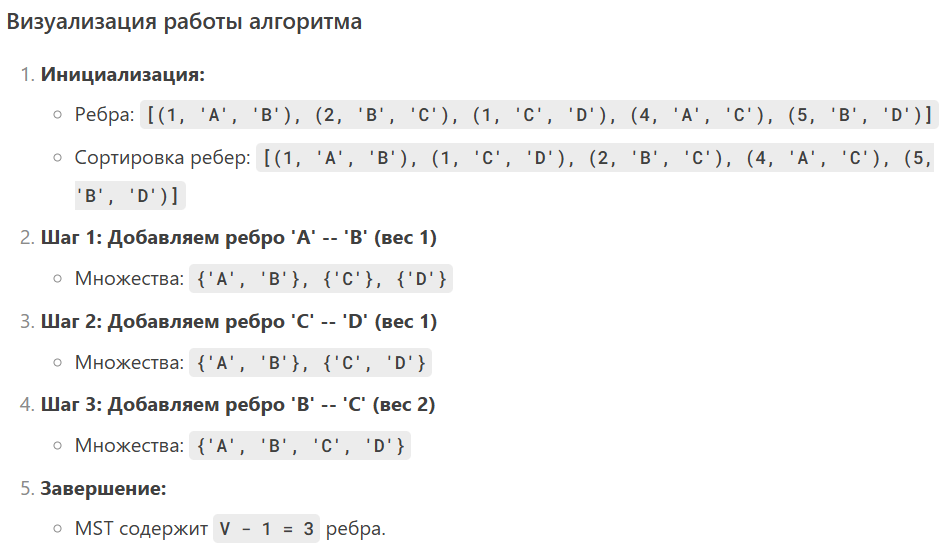

**Сложность алгоритма**
* Сортировка ребер: $O(E log E)$, где $E$ — количество ребер.

* Общая сложность: $O(E log E)$.

**Преимущества алгоритма Крускала**
* Простота реализации:

Алгоритм легко понять и реализовать.

* Эффективность на разреженных графах:

Если ребер мало, алгоритм работает быстрее, чем алгоритм Прима.

## Топологическая сортировка (Topological Sorting)

**Топологическая сортировка** — это линейное упорядочивание вершин графа, при котором для каждого ориентированного ребра
$u → v$ вершина $u$ идет перед вершиной $v$. Такой порядок возможен только в ациклических графах (DAG).

**Применение**:

Топологическая сортировка используется в задачах, где есть зависимости между объектами (например, задачи планирования, компиляции программ).

**Алгоритмы**:

* На основе поиска в глубину (DFS):

Используется рекурсивный обход графа с добавлением вершин в результат после завершения обработки.

* На основе поиска в ширину (BFS, алгоритм Кана):

Используется подсчет входящих степеней вершин и пошаговое удаление вершин с нулевой входящей степенью.

### Алгоритм на основе DFS
**Шаги**:
* Выберите вершину с нулевой входящей степенью (если граф не содержит циклов, такая вершина всегда существует).

* Рекурсивно обойдите все вершины, достижимые из текущей вершины.

* После завершения обработки вершины добавьте ее в начало результата.

* Повторяйте шаги 1-3, пока все вершины не будут обработаны.

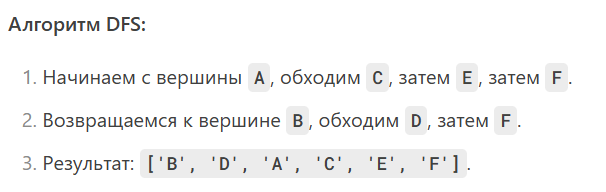

In [ ]:
def topological_sort_dfs(graph):
    # Множество для отслеживания посещенных вершин
    visited = set()
    # Список для хранения результата
    result = []

    def dfs(vertex):
        visited.add(vertex)
        for neighbor in graph.get(vertex, []):
            if neighbor not in visited:
                dfs(neighbor)
        result.append(vertex)  # Добавляем вершину в результат после обработки

    # Обходим все вершины
    for vertex in graph:
        if vertex not in visited:
            dfs(vertex)

    # Результат нужно развернуть, так как вершины добавляются в конец
    return result[::-1]

# Пример графа
graph = {
    'A': ['C'],
    'B': ['C', 'D'],
    'C': ['E'],
    'D': ['F'],
    'E': ['F'],
    'F': []
}

# Топологическая сортировка
sorted_order = topological_sort_dfs(graph)
print("Топологическая сортировка (DFS):", sorted_order)


Топологическая сортировка (DFS): ['B', 'D', 'A', 'C', 'E', 'F']


### Алгоритм Кана (на основе BFS)  

**Шаги**:
* Подсчитайте входящие степени (количество входящих ребер) для всех вершин.

* Добавьте все вершины с нулевой входящей степенью в очередь.

Пока очередь не пуста:

- - Извлеките вершину из очереди и добавьте ее в результат.

- - Уменьшите входящие степени всех соседей этой вершины.

- - Если входящая степень соседа становится нулевой, добавьте его в очередь.

* Если количество вершин в результате меньше, чем в графе, значит, граф содержит цикл.

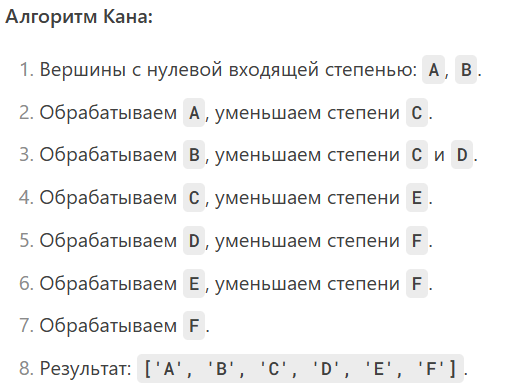

In [ ]:
from collections import deque, defaultdict

def topological_sort_bfs(graph):
    # Подсчет входящих степеней
    in_degree = defaultdict(int)
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1

    # Очередь для вершин с нулевой входящей степенью
    queue = deque([u for u in graph if in_degree[u] == 0])
    result = []

    while queue:
        u = queue.popleft()
        result.append(u)
        for v in graph.get(u, []):
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)

    # Проверка на циклы
    if len(result) != len(graph):
        raise ValueError("Граф содержит цикл!")

    return result

# Пример графа
graph = {
    'A': ['C'],
    'B': ['C', 'D'],
    'C': ['E'],
    'D': ['F'],
    'E': ['F'],
    'F': []
}

# Топологическая сортировка
sorted_order = topological_sort_bfs(graph)
print("Топологическая сортировка (BFS):", sorted_order)

Топологическая сортировка (BFS): ['A', 'B', 'C', 'D', 'E', 'F']


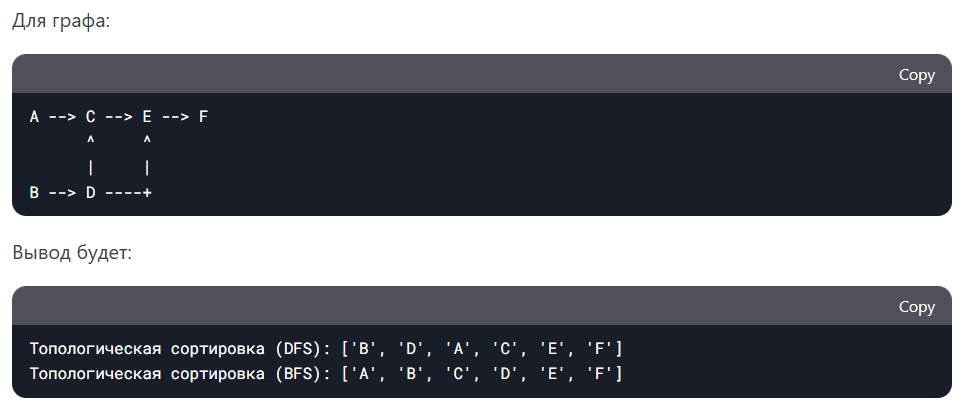

Сложность алгоритмов
* DFS:

- - Время:
$O(V + E)$, где $V$ — количество вершин, $E$ — количество ребер.

- - Память:
$O(V)$ для рекурсивного стека.

* BFS (алгоритм Кана):

- - Время:
$O(V + E)$.

- - Память:
$O(V)$ для очереди и подсчета степеней.

Маленький квиз: https://sborniktestov.ru/quiz/11438?retry=1